In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 例2. EM算法数据缺失问题

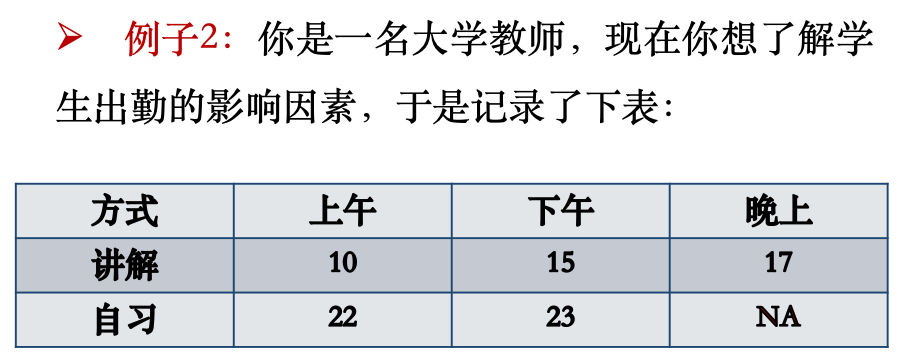

In [6]:
# （1）初始数据:
x = np.array([[10,15,17],[22,23,np.nan]])
print(x)

[[10. 15. 17.]
 [22. 23. nan]]


17.4

In [9]:
# （2）初始化参数
alpha = np.zeros(2)
beta = np.zeros(3)
x_23 = np.nanmean(x)

count = 0
# （3）迭代更新
print('迭代次数','mu','alpha1','alpha2','beta1','beta2','beta3','x_23')
while True:
    x[1,2] = x_23
    mu = np.mean(x)
    for i in range(2):
        alpha_i = np.mean(x[i,:])-mu
        alpha[i] = alpha_i
    for j in range(3):
        beta_j = np.mean(x[:,j])-mu
        beta[j] = beta_j
    x_23_update = mu+alpha[1]+beta[2]
    if np.abs(x_23_update-x_23)<=1e-10:
        break
    x_23 = x_23_update
    count += 1
    print(f'{count}',f'{mu:.2f}',f'{alpha[0]:.2f}',f'{alpha[1]:.2f}',f'{beta[0]:.2f}',f'{beta[1]:.2f}',f'{beta[2]:.2f}',f'{x_23_update:.2f}')

迭代次数 mu alpha1 alpha2 beta1 beta2 beta3 x_23
1 17.67 -3.67 3.67 -1.67 1.33 0.33 21.67
2 18.11 -4.11 4.11 -2.11 0.89 1.22 23.44
3 18.41 -4.41 4.41 -2.41 0.59 1.81 24.63
4 18.60 -4.60 4.60 -2.60 0.40 2.21 25.42
5 18.74 -4.74 4.74 -2.74 0.26 2.47 25.95
6 18.82 -4.82 4.82 -2.82 0.18 2.65 26.30
7 18.88 -4.88 4.88 -2.88 0.12 2.77 26.53
8 18.92 -4.92 4.92 -2.92 0.08 2.84 26.69
9 18.95 -4.95 4.95 -2.95 0.05 2.90 26.79
10 18.97 -4.97 4.97 -2.97 0.03 2.93 26.86
11 18.98 -4.98 4.98 -2.98 0.02 2.95 26.91
12 18.98 -4.98 4.98 -2.98 0.02 2.97 26.94
13 18.99 -4.99 4.99 -2.99 0.01 2.98 26.96
14 18.99 -4.99 4.99 -2.99 0.01 2.99 26.97
15 19.00 -5.00 5.00 -3.00 0.00 2.99 26.98
16 19.00 -5.00 5.00 -3.00 0.00 2.99 26.99
17 19.00 -5.00 5.00 -3.00 0.00 3.00 26.99
18 19.00 -5.00 5.00 -3.00 0.00 3.00 26.99
19 19.00 -5.00 5.00 -3.00 0.00 3.00 27.00
20 19.00 -5.00 5.00 -3.00 0.00 3.00 27.00
21 19.00 -5.00 5.00 -3.00 0.00 3.00 27.00
22 19.00 -5.00 5.00 -3.00 0.00 3.00 27.00
23 19.00 -5.00 5.00 -3.00 0.00 3.00 27.0

## 例4. 包含隐变量的硬币盲盒
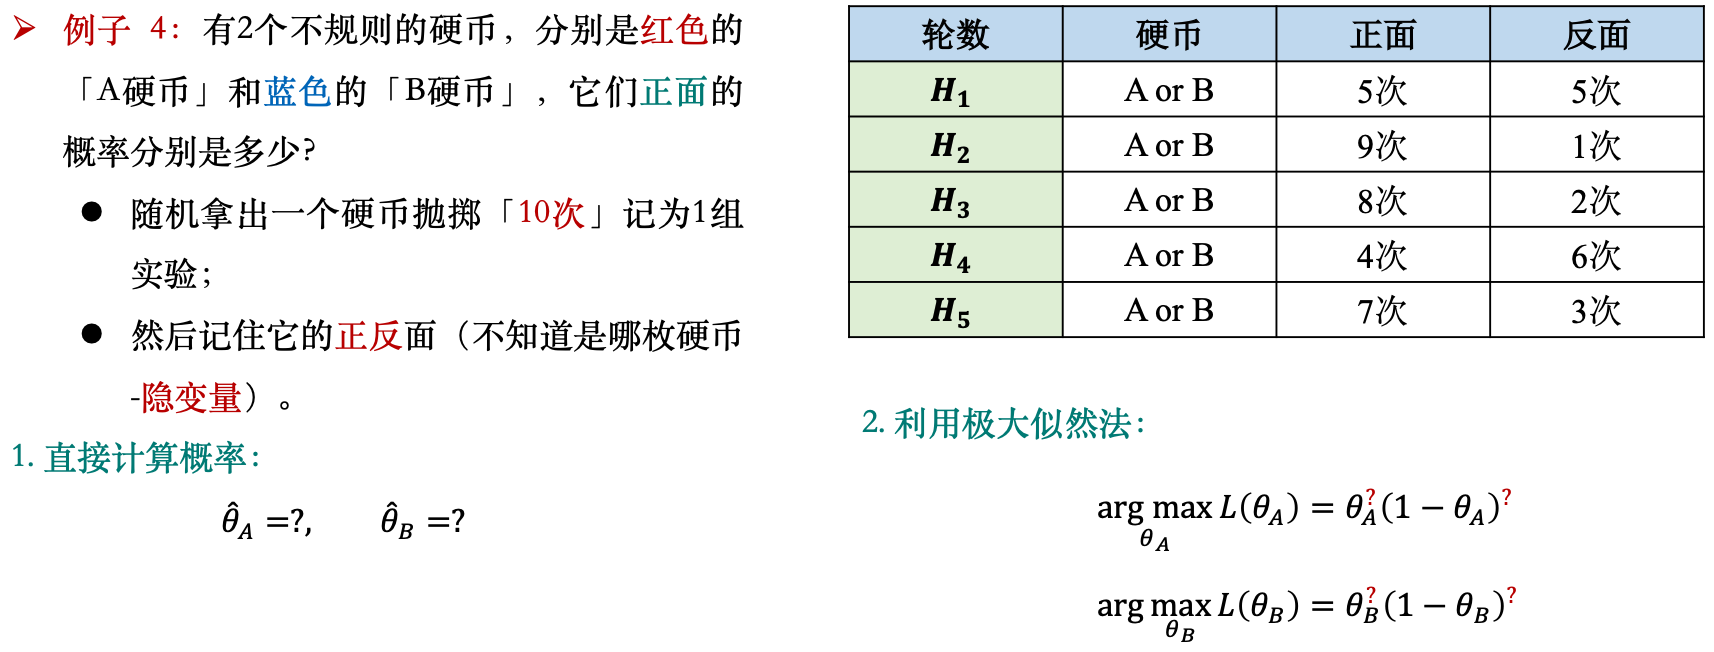

In [11]:
observations = {'H1':[5,5],'H2':[9,1],'H3':[8,2],'H4':[4,6],'H5':[7,3]}
data = np.array(list(observations.values()))
# step 1. 初始化参数
theta_A, theta_B = 0.6, 0.5
count = 0
while True:
    count += 1
    print('第{}次迭代'.format(count))
    # step 2. E步：
    # (1)计算每个样本属于A或B的概率
    prob_A = np.zeros(data.shape[0])
    prob_B = np.zeros(data.shape[0])
    for i,group in enumerate(observations.keys()):
        A = (theta_A**observations[group][0])*((1-theta_A)**observations[group][1])
        B = (theta_B**observations[group][0])*((1-theta_B)**observations[group][1])
        prob_A[i] = A/(A+B)
        prob_B[i] = B/(A+B)
    # (2) 计算A，B抛出正面，反面的期望次数
    x1 = np.sum(prob_A*data[:,0])
    x2 = np.sum(prob_A*data[:,1])
    x3 = np.sum(prob_B*data[:,0])
    x4 = np.sum(prob_B*data[:,1])
    print('E步：x1={:.2f},x2={:.2f},x3={:.2f},x4={:.2f}'.format(x1,x2,x3,x4))
    # step 3. M步：
    # (1) max theta_A, theta_B
    theta_A_new = x1/(x1+x2)
    theta_B_new = x3/(x3+x4)
    print('M步：theta_A={:.2f},theta_B={:.2f}'.format(theta_A_new,theta_B_new))
    # (2) 判断是否收敛
    if np.abs(theta_A_new-theta_A)<1e-10 and np.abs(theta_B_new-theta_B)<1e-10:
        break
    # (3) 更新参数
    theta_A = theta_A_new
    theta_B = theta_B_new
    print('-'*50)


第1次迭代
E步：x1=21.30,x2=8.57,x3=11.70,x4=8.43
M步：theta_A=0.71,theta_B=0.58
--------------------------------------------------
第2次迭代
E步：x1=19.21,x2=6.56,x3=13.79,x4=10.44
M步：theta_A=0.75,theta_B=0.57
--------------------------------------------------
第3次迭代
E步：x1=19.41,x2=5.86,x3=13.59,x4=11.14
M步：theta_A=0.77,theta_B=0.55
--------------------------------------------------
第4次迭代
E步：x1=19.75,x2=5.47,x3=13.25,x4=11.53
M步：theta_A=0.78,theta_B=0.53
--------------------------------------------------
第5次迭代
E步：x1=19.98,x2=5.28,x3=13.02,x4=11.72
M步：theta_A=0.79,theta_B=0.53
--------------------------------------------------
第6次迭代
E步：x1=20.09,x2=5.19,x3=12.91,x4=11.81
M步：theta_A=0.79,theta_B=0.52
--------------------------------------------------
第7次迭代
E步：x1=20.14,x2=5.16,x3=12.86,x4=11.84
M步：theta_A=0.80,theta_B=0.52
--------------------------------------------------
第8次迭代
E步：x1=20.16,x2=5.15,x3=12.84,x4=11.85
M步：theta_A=0.80,theta_B=0.52
--------------------------------------------------
第9次迭代
E步：

## 例5 三硬币模型

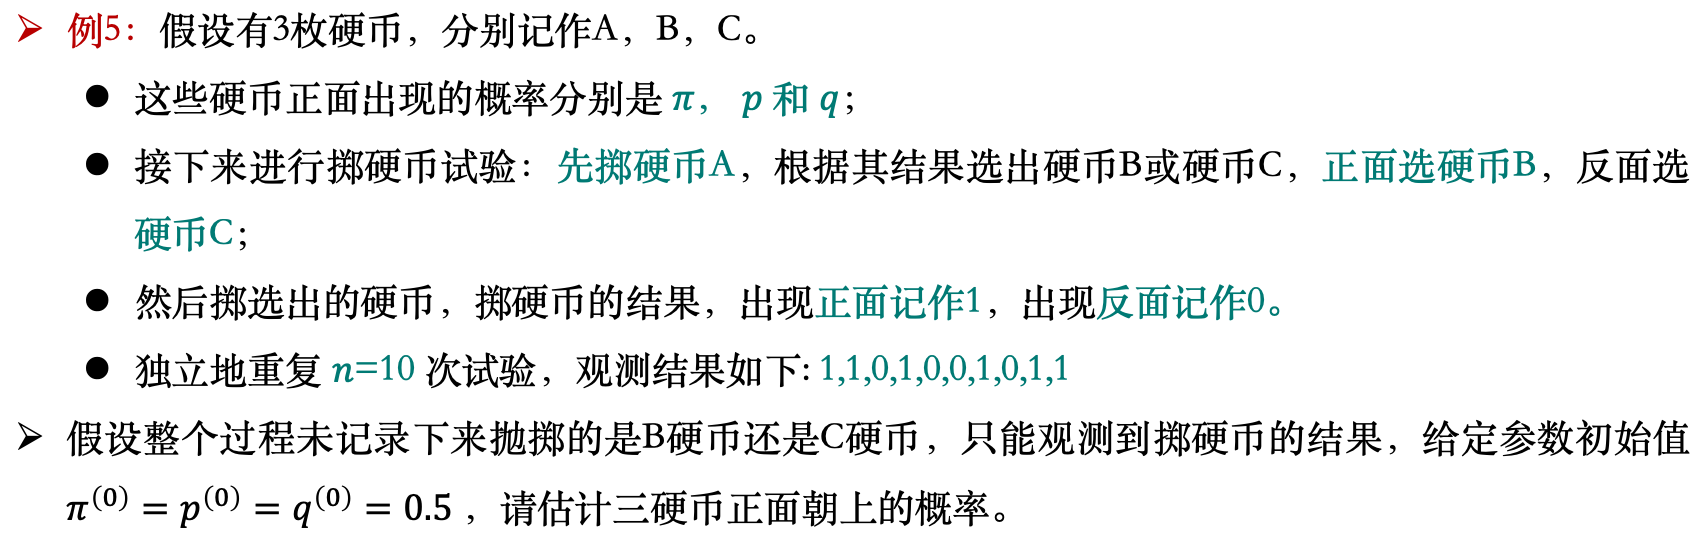

In [22]:
Y = np.array([1,1,0,1,0,0,1,0,1,1])
pi, p, q = 0.5,0.5,0.5

def cal_prob_B(y_i,pi, p, q):
    B = pi*(p**y_i)*((1-p)**(1-y_i))
    C = (1-pi)*(q**y_i)*((1-q)**(1-y_i))
    prob_B = B/(B+C)
    return prob_B

def E_step(Y,pi, p, q):
    prob_Bs = []
    for i in range(len(Y)):
        prob_B = cal_prob_B(Y[i],pi, p, q)
        prob_Bs.append(prob_B)
    return np.array(prob_Bs)

def M_step(Y,prob_Bs):
    pi = np.mean(prob_Bs)
    p = (prob_Bs*Y).sum()/prob_Bs.sum()
    q = ((1-prob_Bs)*Y).sum()/(1-prob_Bs).sum()
    return pi,p,q

# EM算法
count = 0
while True:
    count += 1
    print('第{}次迭代'.format(count))
    prob_Bs = E_step(Y,pi, p, q)
    print('E步：',np.array(prob_Bs))
    pi_update,p_update,q_update = M_step(Y,prob_Bs)
    print('M步：pi-{:.2f},p-{:.2f},q-{:.2f}'.format(pi_update,p_update,q_update))
    if np.abs(pi-pi_update)<=1e-10 and np.abs(p-p_update)<=1e-10 and np.abs(q-q_update)<=1e-10:
        break
    else:
        pi,p,q = pi_update,p_update,q_update 
    print('------------------')




第1次迭代
E步： [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
M步：pi-0.50,p-0.60,q-0.60
------------------
第2次迭代
E步： [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
M步：pi-0.50,p-0.60,q-0.60
